In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import matplotlib.image as mpimg

In [2]:
images_src=[]
for i in range(0,6):
    img = mpimg.imread("../curveB/src/sample"+str(i)+".jpg")
    images_src.append(img)

In [3]:
images_src1=[]
for i in range(0,6):
    img = mpimg.imread("../curveB/src1/sample"+str(i)+".jpg")
    images_src1.append(img)

In [4]:
images_pre=[]
for i in range(0,6):
    img = mpimg.imread("../curveB/prepro/sample"+str(i)+".jpg")
    images_pre.append(img)

In [5]:
images_out =[]
for i in range(0,6):
    img = mpimg.imread("../curveB/out/sample"+str(i)+".jpg")
    images_out.append(img)

In [6]:
def plot_image(imgs,t):
    fig, axs = plt.subplots(2, 3)
    k = 0
    for i in range(0,2):
        for j in range(0,3):
            axs[i, j].set_title(t+" "+str(k))
            axs[i,j].imshow(imgs[k])
            k +=1
    for ax in axs.flat:
        ax.set(xlabel="column", ylabel="row")
    for ax in axs.flat:
        ax.label_outer()

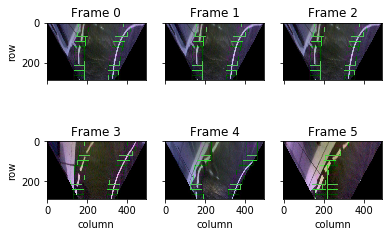

In [7]:
plot_image(images_src,"Frame")

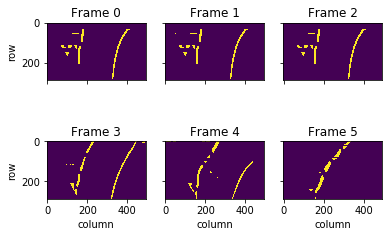

In [8]:
plot_image(images_pre,"Frame")

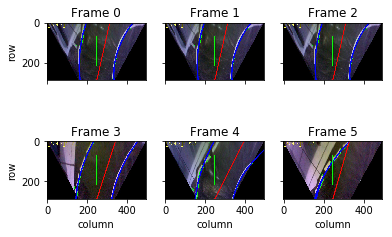

In [9]:
plot_image(images_out,"Frame")

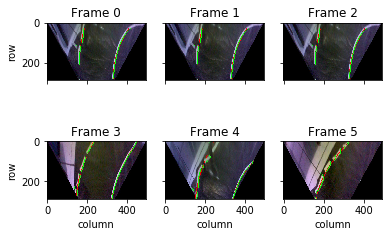

In [10]:
plot_image(images_src1,"Frame")

In [11]:
data_left=[]
for i in range(0,6):
    source = "../curveB/csv/dataL"+str(i)+".csv"
    aux = pd.read_csv(source)
    data_left.append(aux)

In [12]:
def plot_data(df,r,c,col):
    fig, axs = plt.subplots(2, 3)
    k = 0
    for i in range(0,2):
        for j in range(0,3):
            axs[i, j].set_title("Frame "+str(k))
            sns.lineplot(df[k][c],df[k][r], color=col,ax=axs[i,j])
            k +=1
    for ax in axs.flat:
        ax.set(xlabel="column", ylabel="row")
    for ax in axs.flat:
        ax.label_outer()

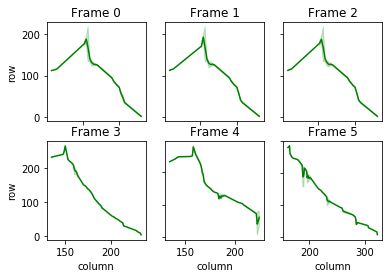

In [13]:
plot_data(data_left,"row_data","col_data","g")

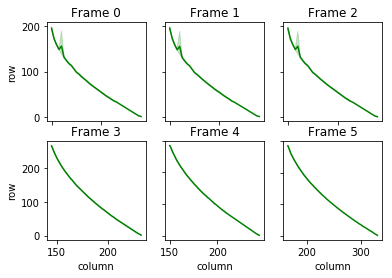

In [14]:
plot_data(data_left,"row_model","col_model","g")

In [15]:
def distribution_variable(df,col,c):
    fig, axs = plt.subplots(2, 3)
    k = 0
    for i in range(0,2):
        for j in range(0,3):
            axs[i, j].set_title("Frame "+str(k))
            sns.distplot(df[k][col], hist=False, color=c, kde_kws={"shade": True}, ax=axs[i,j])
            k +=1
    for ax in axs.flat:
        ax.set(xlabel="column",ylabel="Density")
    for ax in axs.flat:
        ax.label_outer()

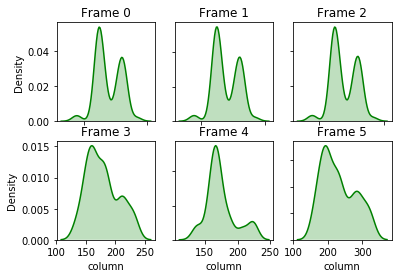

In [16]:
distribution_variable(data_left,"col_data","g")

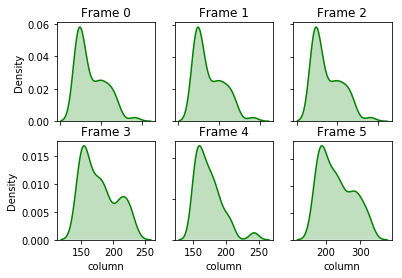

In [17]:
distribution_variable(data_left,"col_model","g")

In [18]:
for i in range(0,6):    
    data_left[i]["absolute_error"]= abs(data_left[i]["col_model"]-data_left[i]["col_data"])

In [19]:
MAE_LEFT = []
for i in range(0,6):    
    aux = data_left[i]["absolute_error"].sum()/data_left[i]["absolute_error"].count()
    MAE_LEFT.append(aux)
MAE_LEFT

[2.5588235294117645,
 2.5764705882352943,
 2.5294117647058822,
 3.120833333333333,
 7.030150753768845,
 4.680497925311204]

In [20]:
for i in range(0,6):    
    data_left[i]["quadratic_error"]= pow((data_left[i]["col_model"]-data_left[i]["col_data"]),2)

In [21]:
MSE_LEFT = []
for i in range(0,6):    
    aux =  np.sqrt(data_left[i]["quadratic_error"].sum()/data_left[i]["quadratic_error"].count())
    MSE_LEFT.append(aux)
MSE_LEFT 

[4.675971116501143,
 4.657694456172369,
 4.6399797159800045,
 4.485625188681432,
 9.033994981547929,
 6.037916158350471]

In [22]:
left_errors = pd.DataFrame()
left_errors["RMSE_LEFT"] = MSE_LEFT 
left_errors["MAE_LEFT"] = MAE_LEFT
left_errors
#writer = pd.ExcelWriter('../test1/errorL.xlsx')
#left_errors.to_excel(writer)
#writer.save()

,RMSE_LEFT,MAE_LEFT
0,4.675971,2.558824
1,4.657694,2.576471
2,4.639980,2.529412
3,4.485625,3.120833
4,9.033995,7.030151
5,6.037916,4.680498


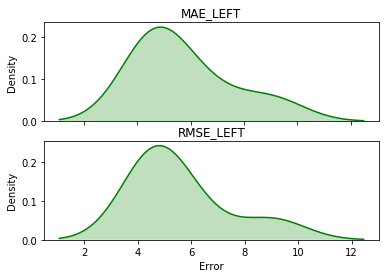

In [24]:
fig, axes = plt.subplots(2)
axes[0].set_title("MAE_LEFT")
sns.distplot(left_errors["MAE_LEFT"], hist=False, color="g", kde_kws={"shade": True}, ax=axes[0])
axes[1].set_title("RMSE_LEFT")
sns.distplot(left_errors["RMSE_LEFT"], hist=False, color="g", kde_kws={"shade": True}, ax=axes[1])
for ax in axes.flat:
    ax.set(xlabel="Error",ylabel="Density")
for ax in axes.flat:
    ax.label_outer()

In [25]:
data_right=[]
for i in range(0,6):
    source = "../curveB/csv/dataR"+str(i)+".csv"
    aux = pd.read_csv(source)
    data_right.append(aux)

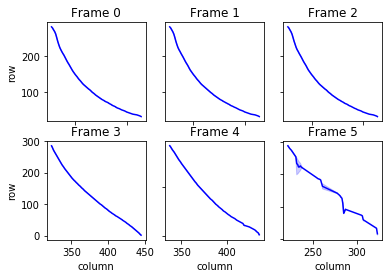

In [26]:
plot_data(data_right,"row_data","col_data","b")

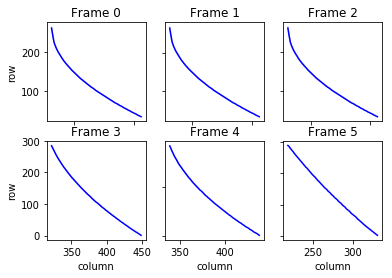

In [27]:
plot_data(data_right,"row_model","col_model","b")

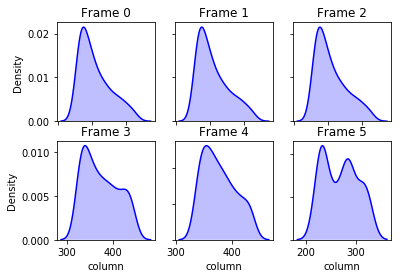

In [28]:
distribution_variable(data_right,"col_data","b")

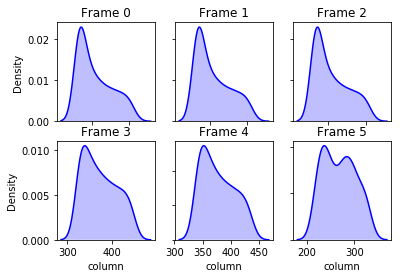

In [29]:
distribution_variable(data_right,"col_model","b")

In [30]:
for i in range(0,6):    
    data_right[i]["absolute_error"]= abs(data_right[i]["col_model"]-data_right[i]["col_data"])

In [32]:
MAE_RIGHT = []
for i in range(0,6):    
    aux = data_right[i]["absolute_error"].sum()/data_right[i]["absolute_error"].count()
    MAE_RIGHT.append(aux)
MAE_RIGHT

[1.7630522088353413,
 1.7791164658634537,
 1.7751004016064258,
 0.8251748251748252,
 1.1881720430107527,
 4.388888888888889]

In [34]:
for i in range(0,6):    
    data_right[i]["quadratic_error"]= pow((data_right[i]["col_model"]-data_right[i]["col_data"]),2)

In [35]:
MSE_RIGHT = []
for i in range(0,6):    
    aux =  np.sqrt(data_right[i]["quadratic_error"].sum()/data_right[i]["quadratic_error"].count())
    MSE_RIGHT.append(aux)
MSE_RIGHT

[2.2575175618738106,
 2.2663949754486654,
 2.265508799471308,
 1.1312472230773782,
 1.4792471203320805,
 5.421151989096864]

In [36]:
right_errors = pd.DataFrame()
right_errors["RMSE_RIGHT"] = MSE_RIGHT
right_errors["MAE_RIGHT"] = MAE_RIGHT
right_errors
#writer = pd.ExcelWriter('../test1/errorR.xlsx')
#right_errors.to_excel(writer)
#writer.save()

,RMSE_RIGHT,MAE_RIGHT
0,2.257518,1.763052
1,2.266395,1.779116
2,2.265509,1.775100
3,1.131247,0.825175
4,1.479247,1.188172
5,5.421152,4.388889


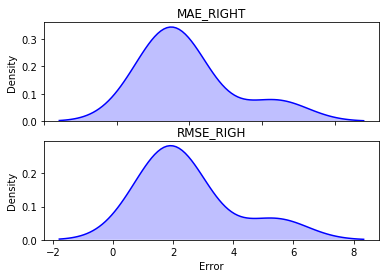

In [38]:
fig, axes = plt.subplots(2)
axes[0].set_title("MAE_RIGHT")
sns.distplot(right_errors["MAE_RIGHT"], hist=False, color="b", kde_kws={"shade": True}, ax=axes[0])
axes[1].set_title("RMSE_RIGH")
sns.distplot(right_errors["RMSE_RIGHT"], hist=False, color="b", kde_kws={"shade": True}, ax=axes[1])
for ax in axes.flat:
    ax.set(xlabel="Error",ylabel="Density")
for ax in axes.flat:
    ax.label_outer()

# for i in range(0,6):
    output = "../test1/data_right"+str(i)+".xlsx"
    writer = pd.ExcelWriter(output)
    data_right[i].to_excel(writer)
    writer.save()

In [40]:
mean_right_errors_MSE = right_errors["RMSE_RIGHT"].mean() 
mean_right_errors_MAE = right_errors["MAE_RIGHT"].mean() 
print(mean_right_errors_MAE)
print(mean_right_errors_MSE)

1.9532508055632813
2.470177944883351


In [41]:
mean_left_errors_MSE = left_errors["RMSE_LEFT"].mean() 
mean_left_errors_MAE = left_errors["MAE_LEFT"].mean() 
print(mean_left_errors_MAE)
print(mean_left_errors_MSE)

3.7493646491277204
5.58853026953889


In [42]:
std_left=[]
for i in range(0,6):
    aux = np.std(data_left[i]["col_data"])
    std_left.append(aux)
std_left

[9.955722042327368,
 9.879929674882451,
 9.917060899571664,
 26.862566891494193,
 21.9946241345684,
 47.907130247613836]

In [43]:
std_right=[]
for i in range(0,6):
    aux = np.std(data_right[i]["col_data"])
    std_right.append(aux)
std_right

[22.650521945796868,
 22.66253851102478,
 22.64545001069745,
 37.28396965679579,
 28.947333476316302,
 33.67812326116997]

In [44]:
mean_left = []
for i in range(0,6):
    aux = np.mean(data_left[i]["col_data"])
    mean_left.append(aux)
mean_left

[169.43529411764706,
 169.45882352941177,
 169.41176470588235,
 178.45,
 174.2462311557789,
 231.33195020746888]

In [45]:
mean_right = []
for i in range(0,6):
    aux = np.mean(data_right[i]["col_data"])
    mean_right.append(aux)
mean_right

[354.8995983935743,
 354.89156626506025,
 354.8955823293173,
 374.0034965034965,
 378.39247311827955,
 269.45238095238096]